
# Visualizing what intermediate layers of the convnets learn


This notebook demonstrates how visualizing convnet output or activations serves as a valuable tool in comprehending the manner by which successive convnet layers modify their input and helps provide an initial insight into the significance of individual convnet filters.


### Importing libraries

In [1]:
# file and directories manipulation
import os
import shutil

# loading and building new models
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras import models

# image data manipulation
import imageio
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Setting up working paths

In [2]:
# Setting up paths
CNN_model = '/kaggle/input/visualizing-what-convbets-learn/models/CNN cats vs dogs model.hdf5'
test_imgs_path = '/kaggle/input/visualizing-what-convbets-learn/test images'

cat_img = '/kaggle/input/visualizing-what-convbets-learn/test images/cat.PNG'
dog_img = '/kaggle/input/visualizing-what-convbets-learn/test images/dog.PNG'

two_cats_img = '/kaggle/input/visualizing-what-convbets-learn/test images/2 cats.PNG'
two_dogs_img = '/kaggle/input/visualizing-what-convbets-learn/test images/2 dogs.PNG'

cat_activations = '/kaggle/working/activations/cat'
dog_activations = '/kaggle/working/activations/dog'

two_cats_activations = '/kaggle/working/activations/two_cats'
two_dogs_activations = '/kaggle/working/activations/two_dogs'

cat_activations_2 = '/kaggle/working/activations_2/cat'
dog_activations_2 = '/kaggle/working/activations_2/dog'

two_cats_activations_2= '/kaggle/working/activations_2/two_cats'
two_dogs_activations_2 = '/kaggle/working/activations_2/two_dogs'

vid_activation = '/kaggle/working/vid_activation'




In [3]:
activation_dirs = [cat_activations, dog_activations, two_cats_activations, two_dogs_activations,
                   cat_activations_2, dog_activations_2, two_cats_activations_2, two_dogs_activations_2, vid_activation ]

# creating working directories
for path in activation_dirs:
    if not(os.path.exists(path)):
        os.makedirs(path)

### Loading and testing CNN image classification model

In [4]:
# loading the original CNN model
model = load_model(CNN_model)
model.summary()

2023-02-22 00:19:01.067779: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-22 00:19:01.067838: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

2 cats.PNG
<class 'numpy.ndarray'>
4.8152042e-09
2 dogs.PNG
<class 'numpy.ndarray'>
0.99938726
dog.PNG
<class 'numpy.ndarray'>
0.99410754
cat.PNG
<class 'numpy.ndarray'>
9.113619e-05


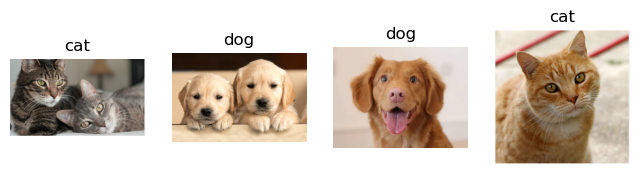

In [5]:
# testing and visualizing CNN model predictions
labels = ["cat","dog"]

ncols = len(os.listdir(test_imgs_path))
fig = plt.figure(figsize=(8, 5))
for i , img_file in enumerate(os.listdir(test_imgs_path)):
    print(img_file)
    img = cv2.imread(os.path.join(test_imgs_path,img_file))
    if (img is None):
        continue
    print(type(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, ncols, i+1)
    plt.imshow(img)
    plt.axis('off')
    
    img = cv2.resize(img,(128,128))
    img = img / 255
    img = np.reshape(img,(1,128,128,3))
    
    results = model.predict(img,verbose = 0)
    results = np.squeeze(results)
    plt.title(labels[np.round(results).astype(int)])

    print(results)
    

### Building the new activations model

In [6]:
# Get the index of the flatten layer 
for i, layer in enumerate(model.layers):
    print(i,layer.name)
    if layer.name.startswith("flatten"):
        break
print(i)
# the outputs of the activation model are the outputs of each layer of
# the CNN model up until the flatten layer
layers_outputs = [layer.output for layer in model.layers[:i]]

0 conv2d_3
1 batch_normalization_4
2 max_pooling2d_3
3 dropout_4
4 conv2d_4
5 batch_normalization_5
6 max_pooling2d_4
7 dropout_5
8 conv2d_5
9 batch_normalization_6
10 max_pooling2d_5
11 dropout_6
12 conv2d_6
13 batch_normalization_7
14 max_pooling2d_6
15 dropout_7
16 flatten_1
16


In [7]:
# building the new activations model
activations_model = models.Model(inputs = model.input, outputs = layers_outputs)
activations_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 128, 128, 3)]    0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496 

### extracting model activations

In [8]:
def get_model_activations(img_path,model,verbose = False):
    
    #preprocess img
    img = cv2.imread(img_path)
    print(type(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = cv2.resize(img,(128,128))
    img = img / 255
    img = np.reshape(img,(1,128,128,3))

    # feed forward the preprocessed image to the activations model
    activations = model.predict(img)

    # display layer shapes
    if verbose:
        print(len(activations))
        for i , activation in enumerate(activations) :
            print(f' layer n°{i} shape : {activation.shape}')
    
    return activations

In [9]:
# get the intermediate layers activations for the cat_img
activations = get_model_activations(cat_img,activations_model)

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 144ms/step


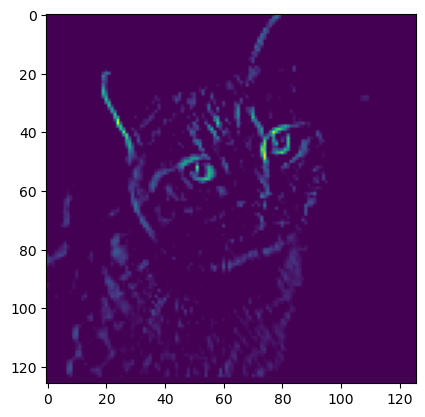

In [10]:
# diplay the 4th feature map of the 1st layer
plt.imshow(activations[0][0,:,:,4], cmap = 'viridis')

### Displaying results as a grid

In [11]:
def display_activations(img_pth ,activations_model , 
                        images_per_row = 16 , save_dir =None
                       ):
    
    # get the list of activations for an image for each layer of the model
    activations = get_model_activations(img_pth
                                        ,activations_model)
    # Get the index of the flatten layer 
    for i, layer in enumerate(model.layers):        
        if layer.name.startswith("flatten"):
            break
    # create a list of model layer names
    layer_names = []
    for idx,layer in enumerate(activations_model.layers[1:i+1]):
        layer_names.append(f'{(idx +1):02d} {layer.name}')

    # create a grid for each layer, and consisting of the layer activations/feature maps
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                :, :,
                col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))

        plt.title(layer_name)
        plt.grid(False)
        plt.axis('off')

        # display the output grid for each layer
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

        # save the grid for each layer in save_dir directory as .png format
        if save_dir is not None:
            if not os.path.isdir(save_dir):
                print(f"Creating {save_dir} ... ")
                os.makedirs(save_dir)
            
            plt.savefig(f'{save_dir}/{layer_name}.png')


<class 'numpy.ndarray'>
1/1 [==============================] - 0s 28ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


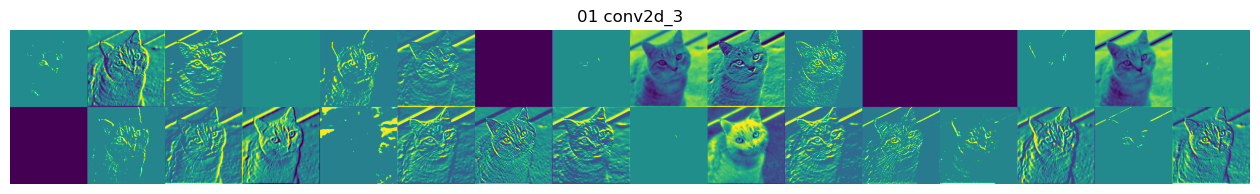

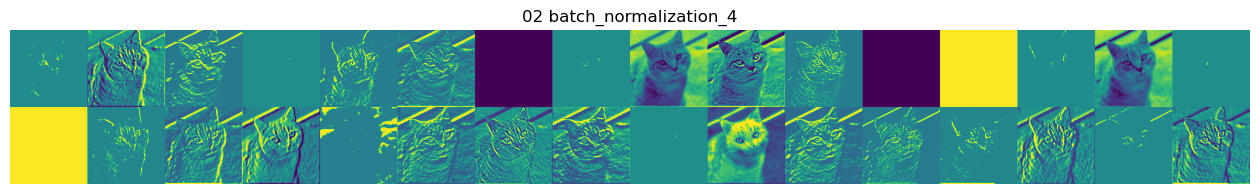

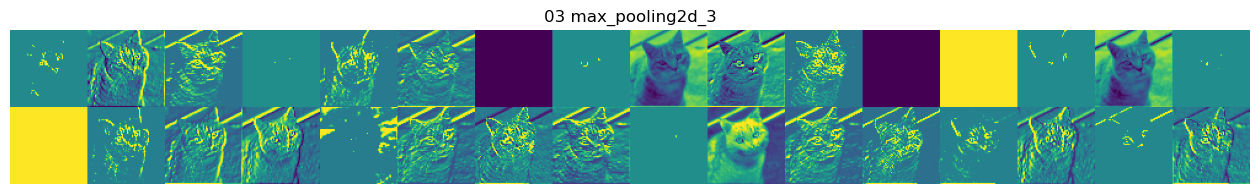

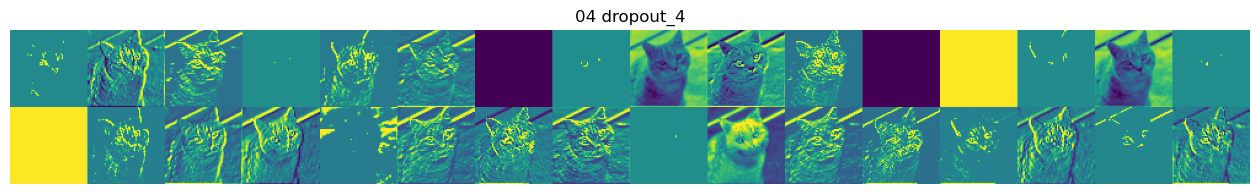

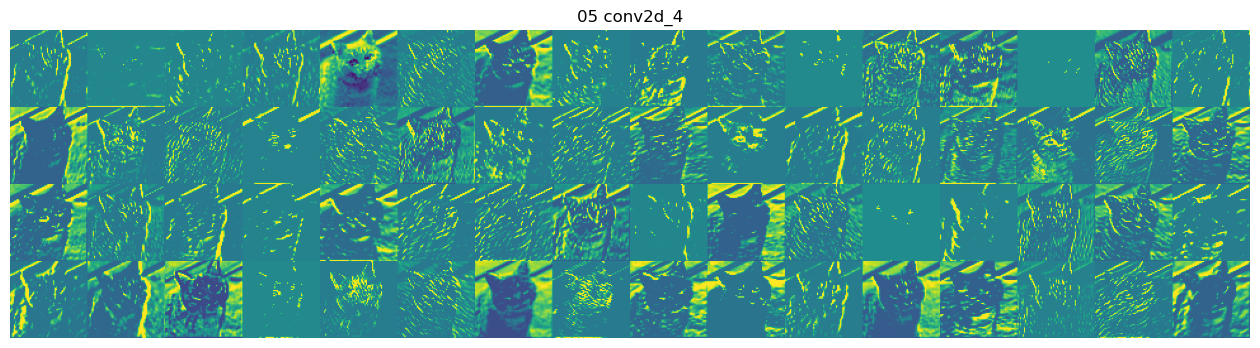

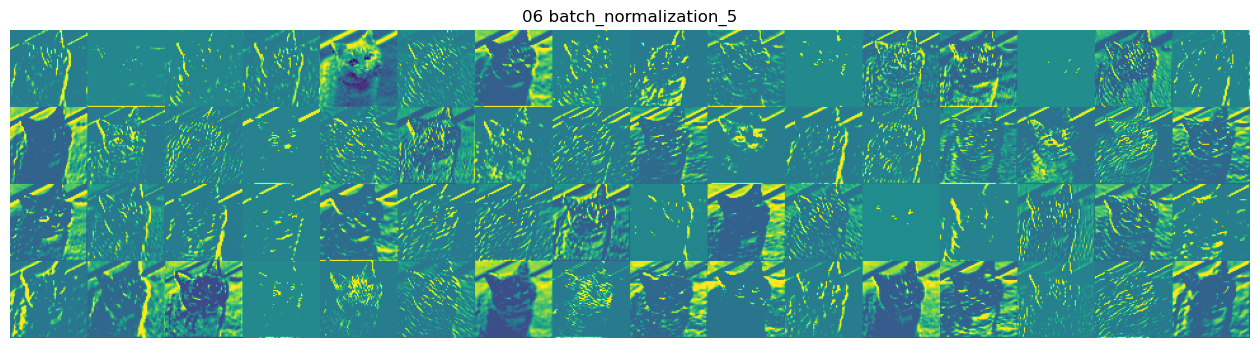

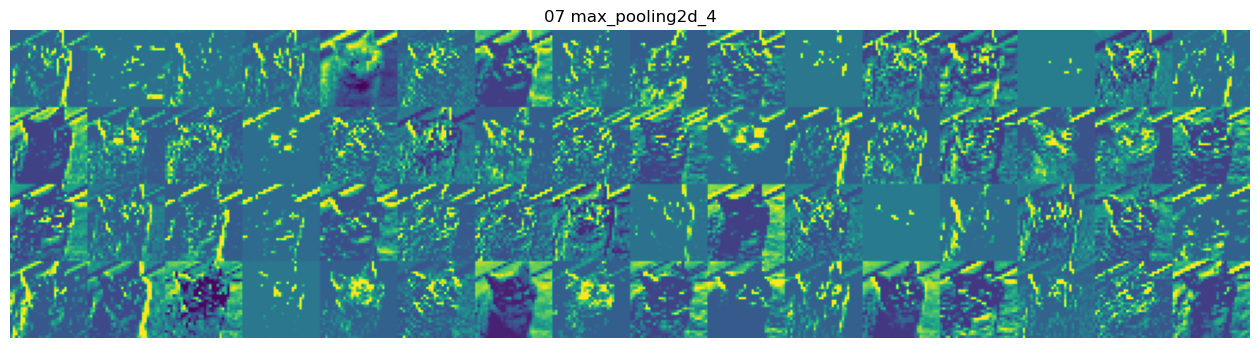

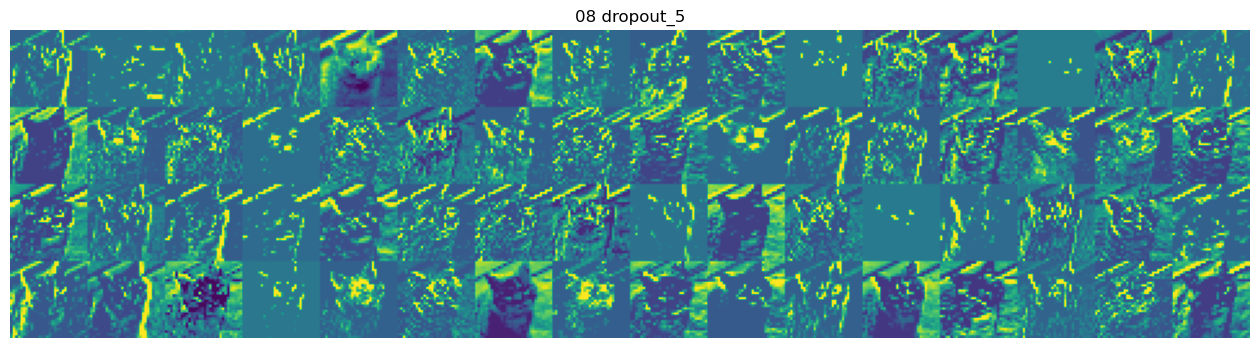

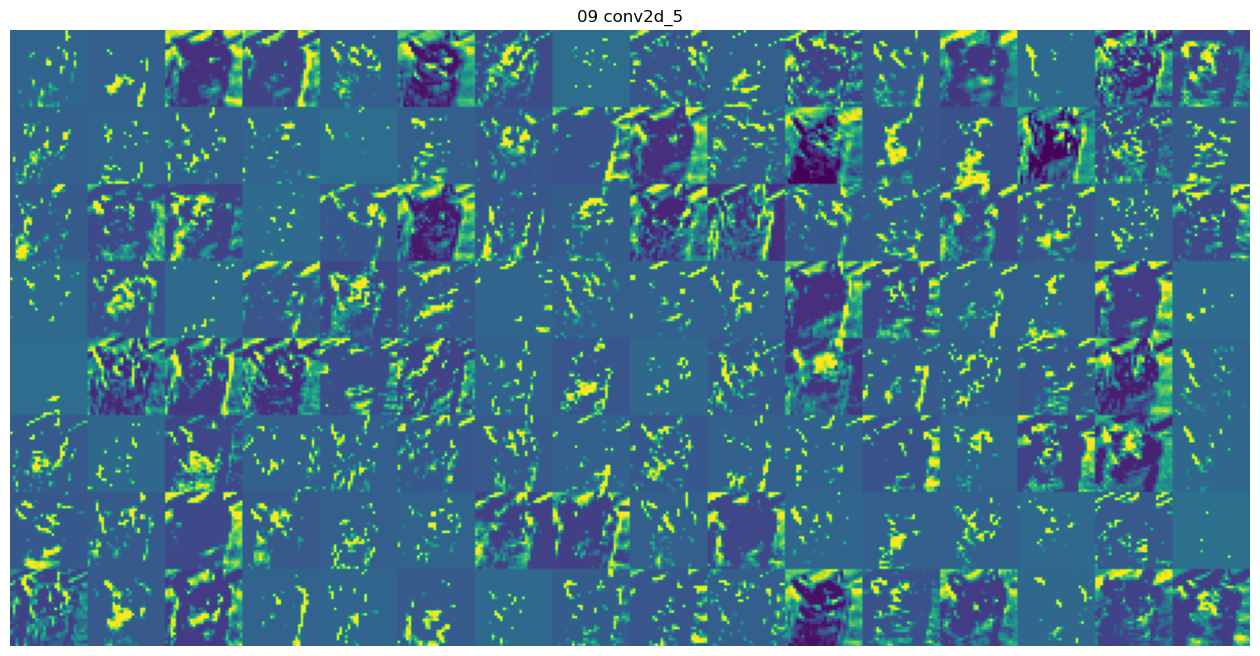

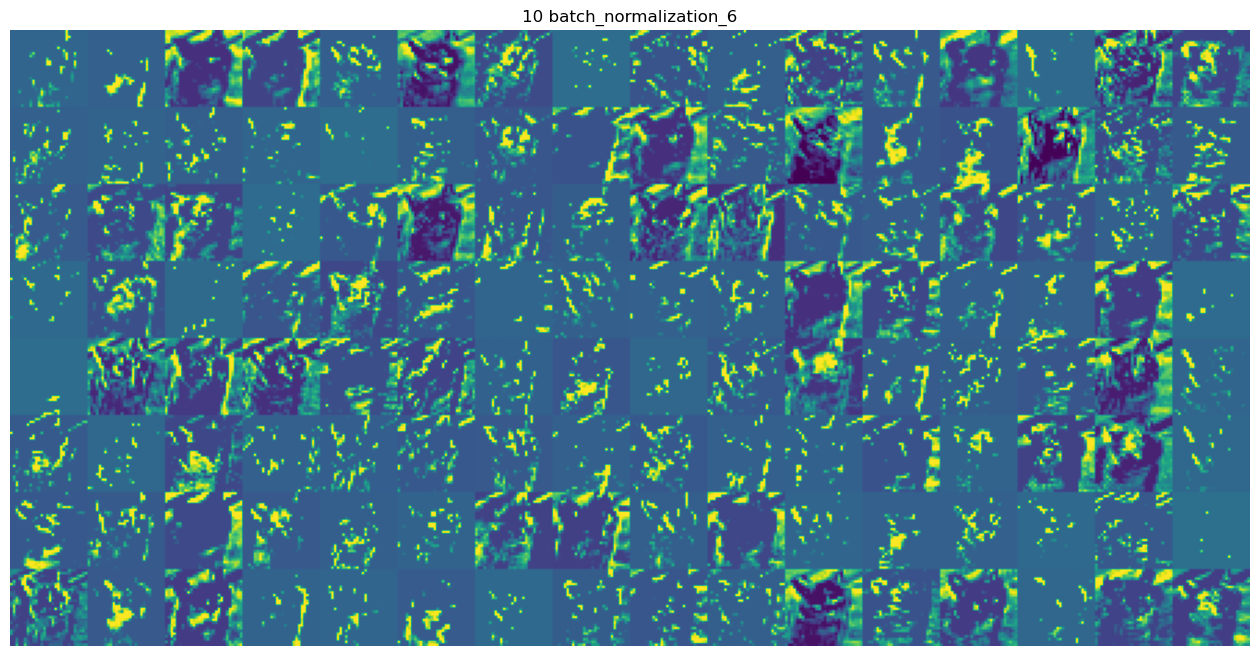

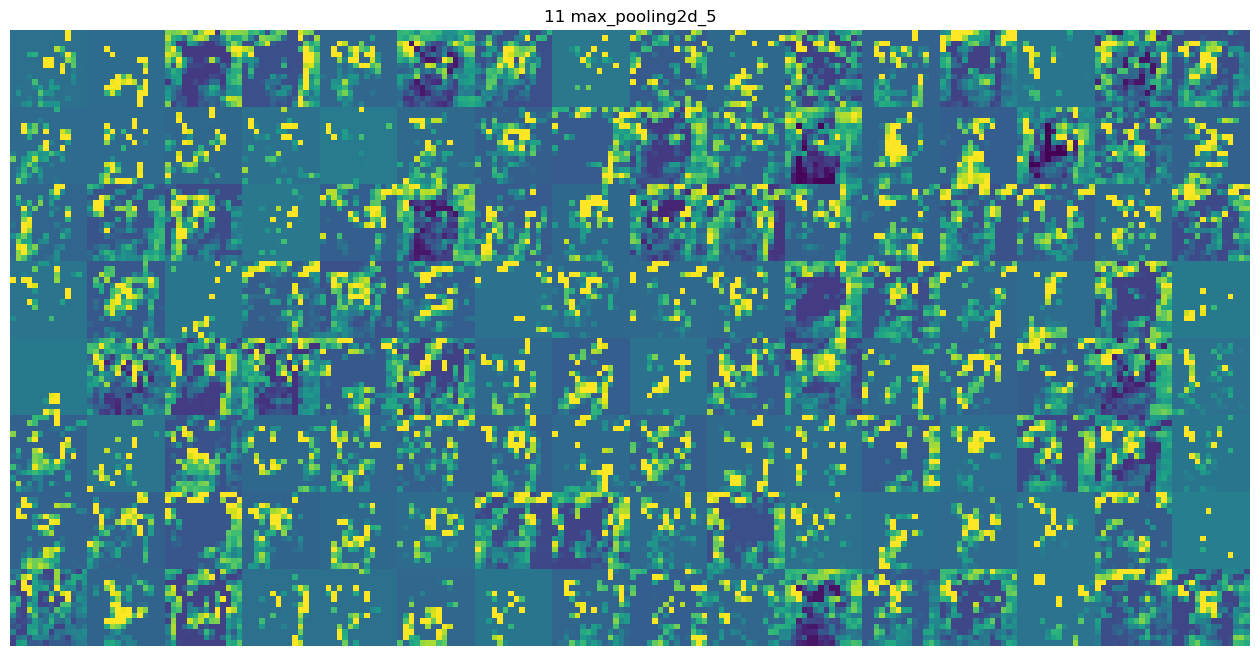

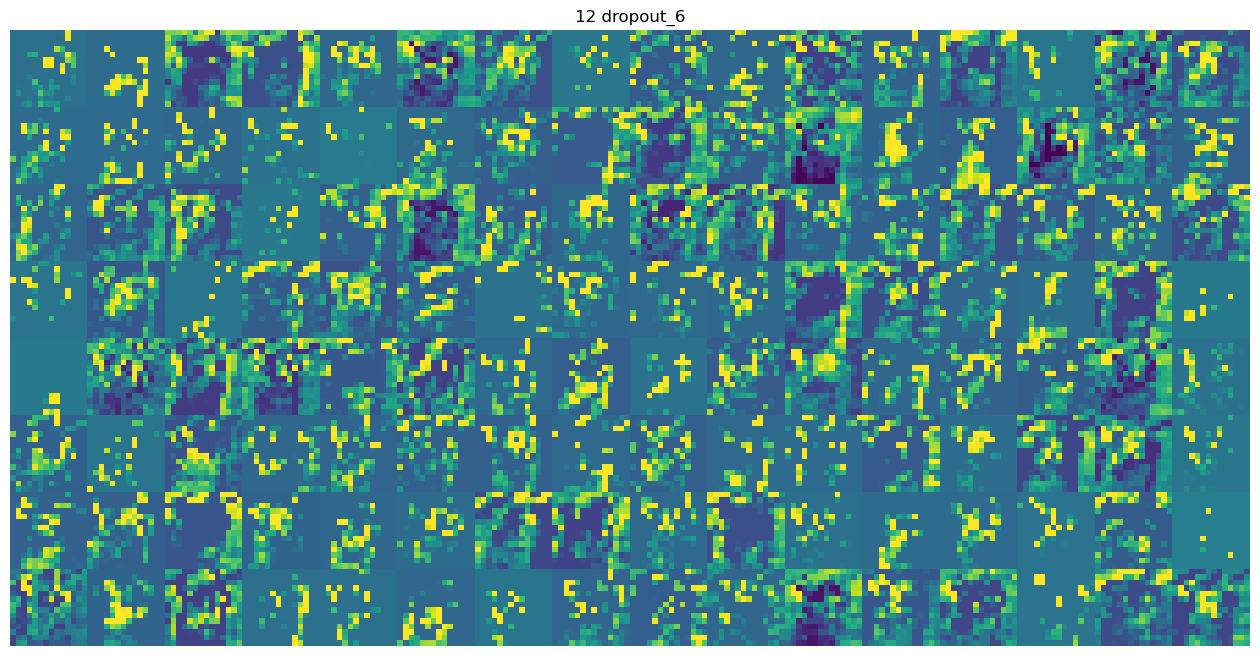

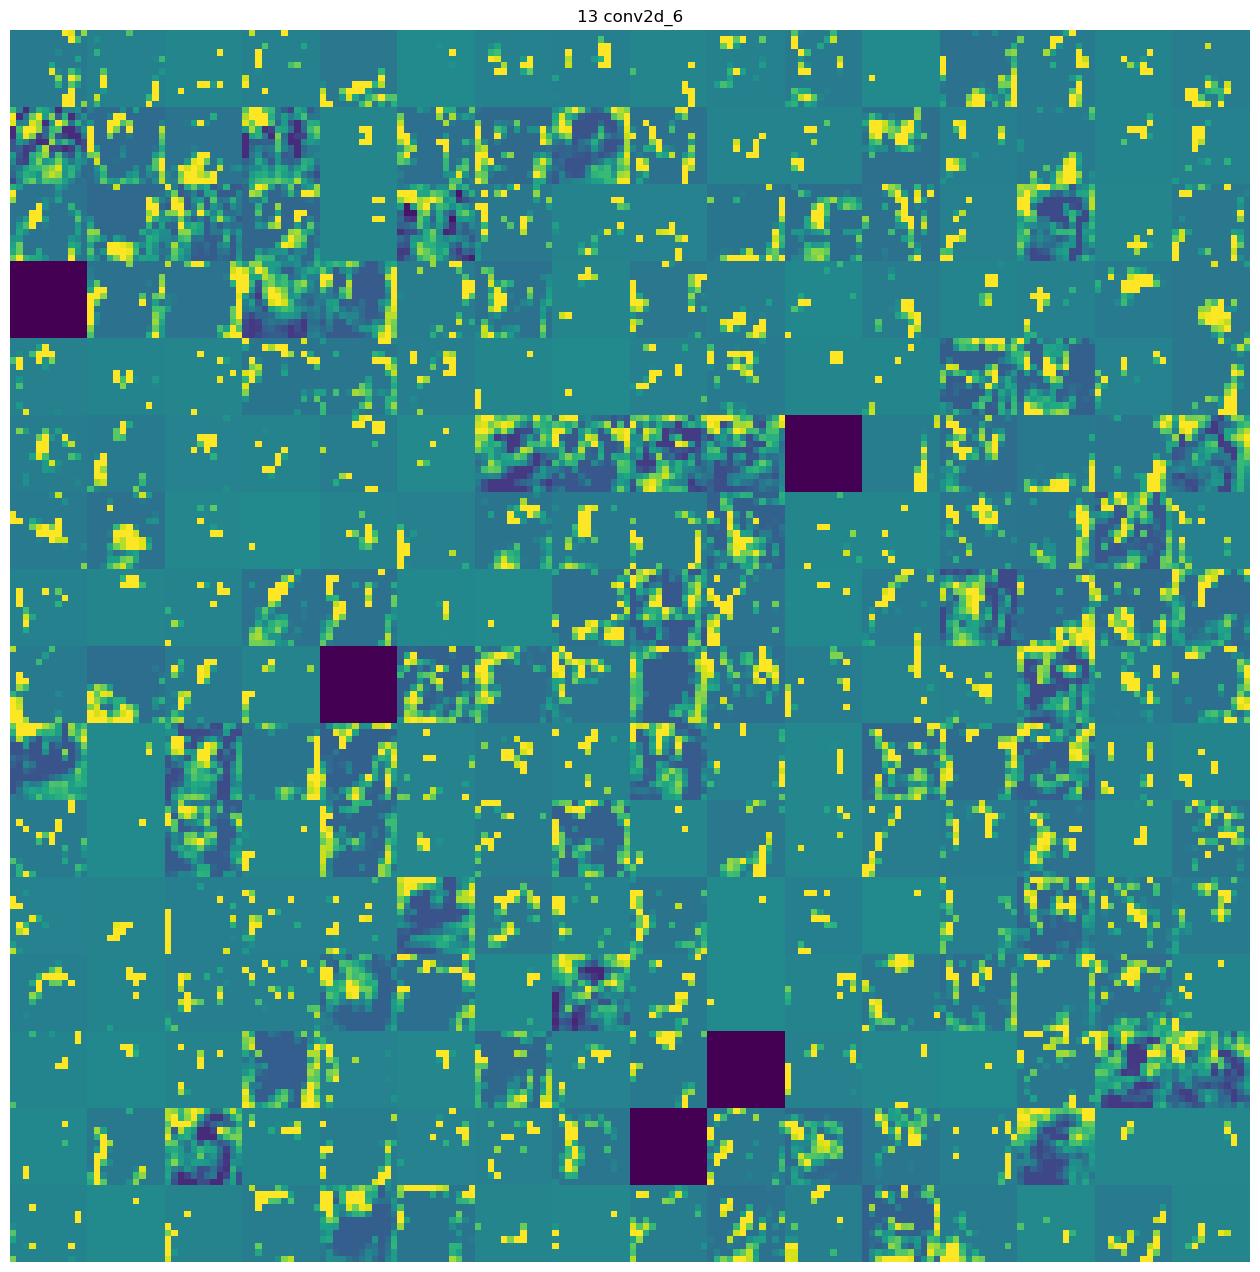

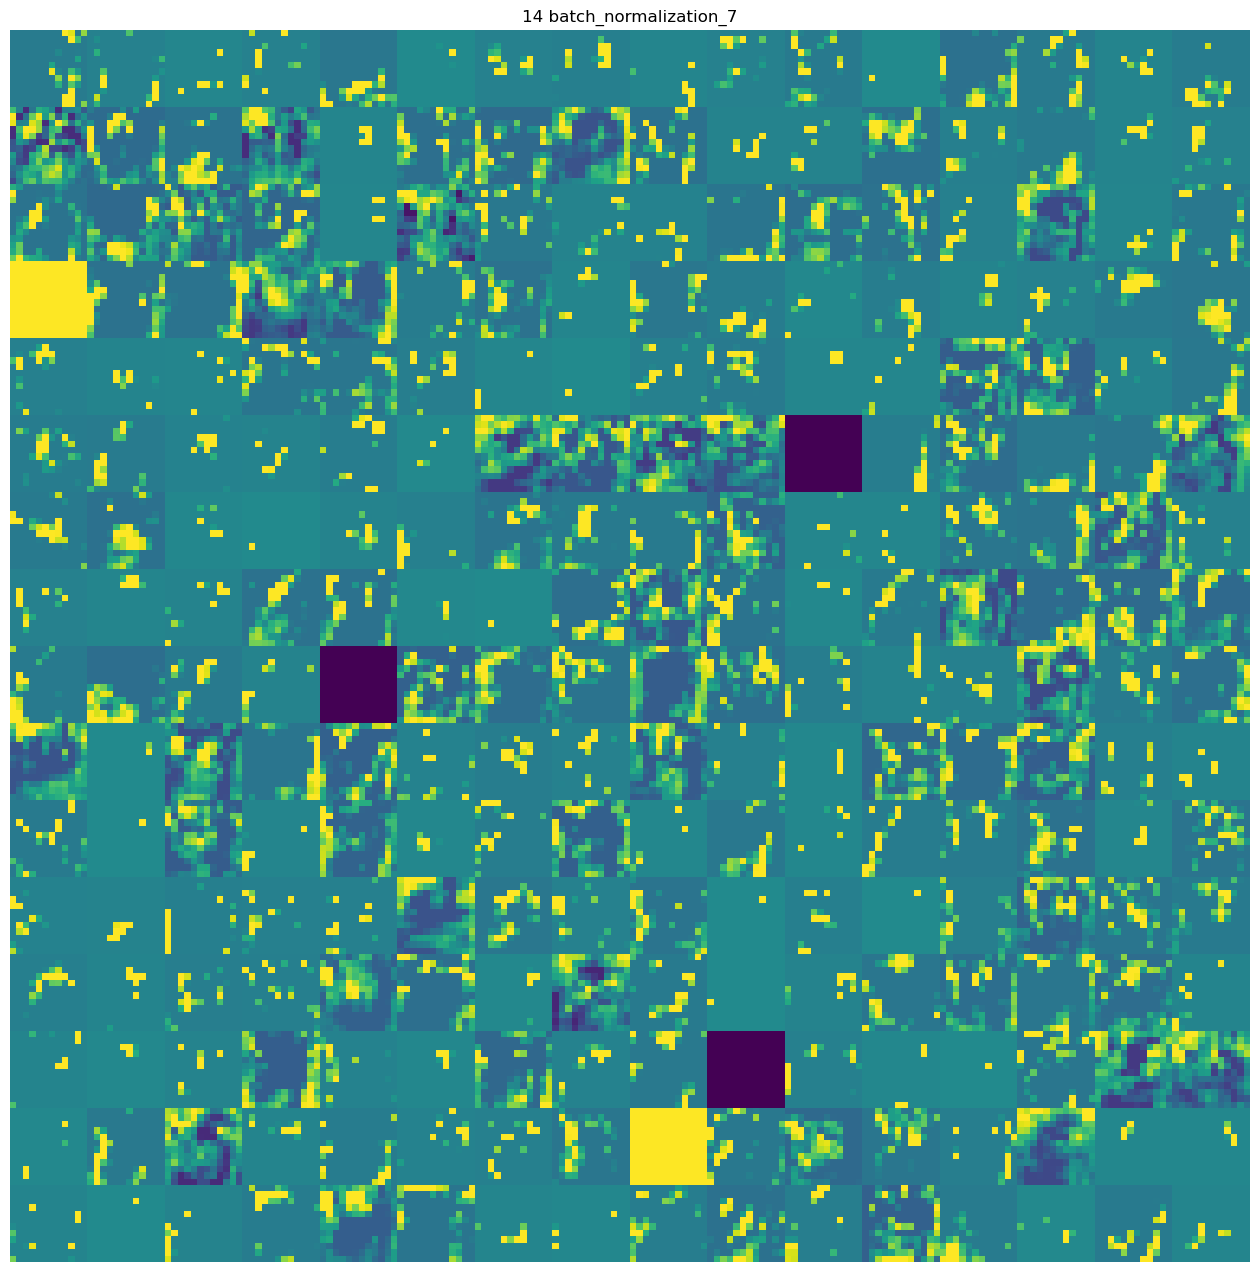

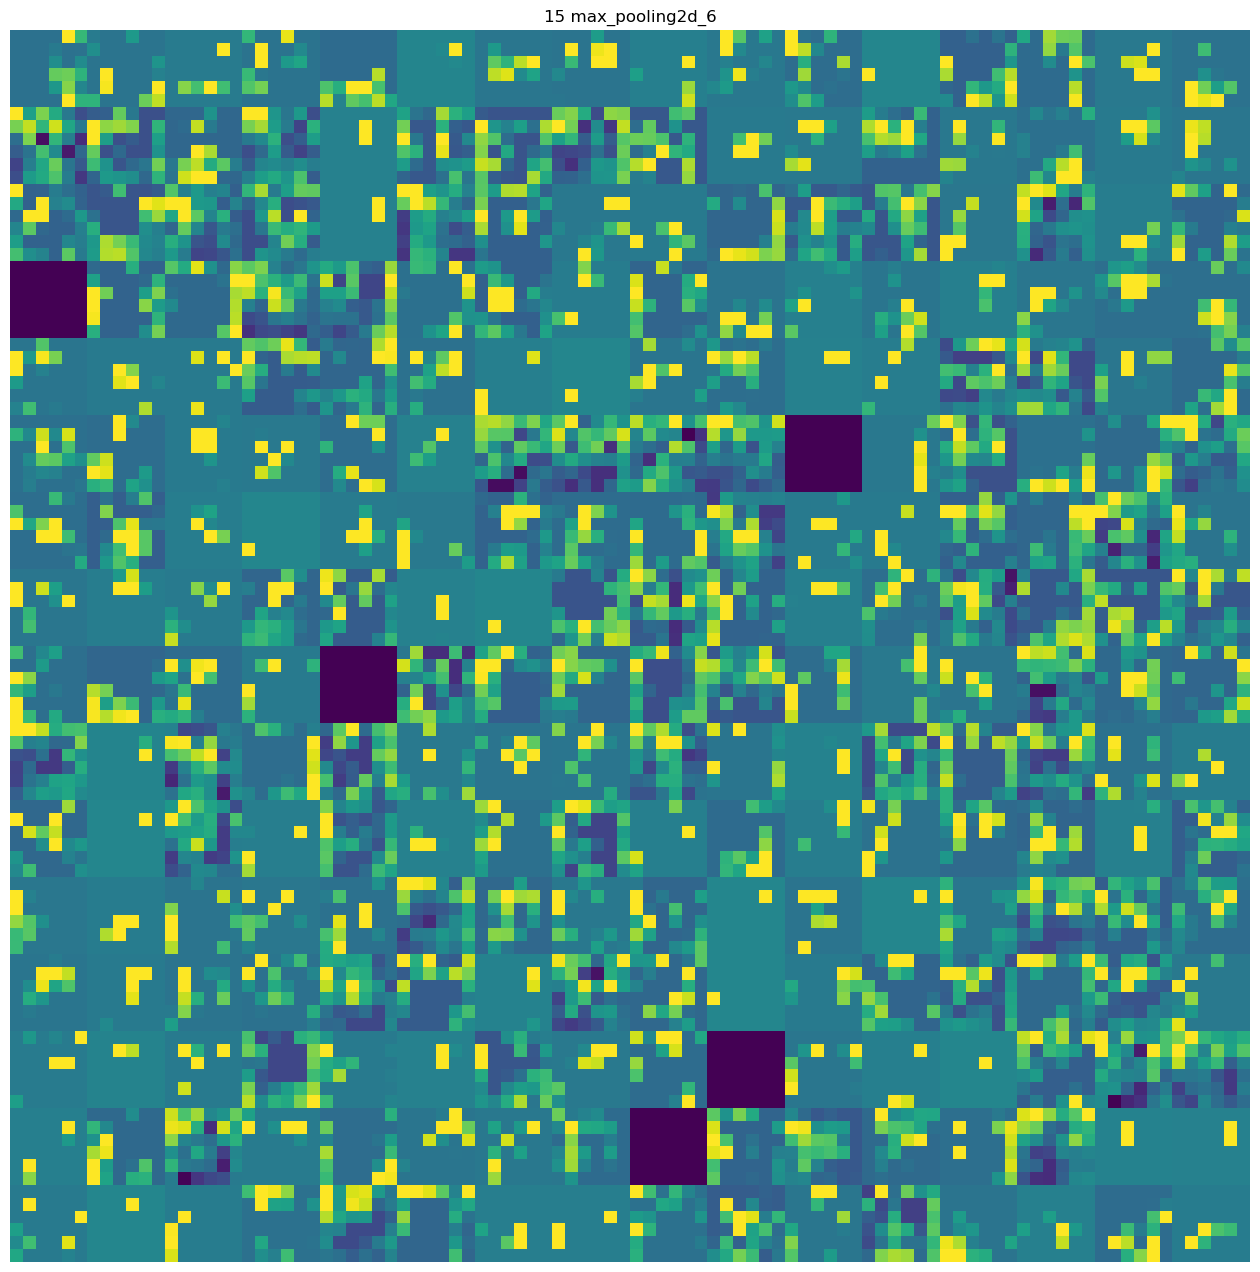

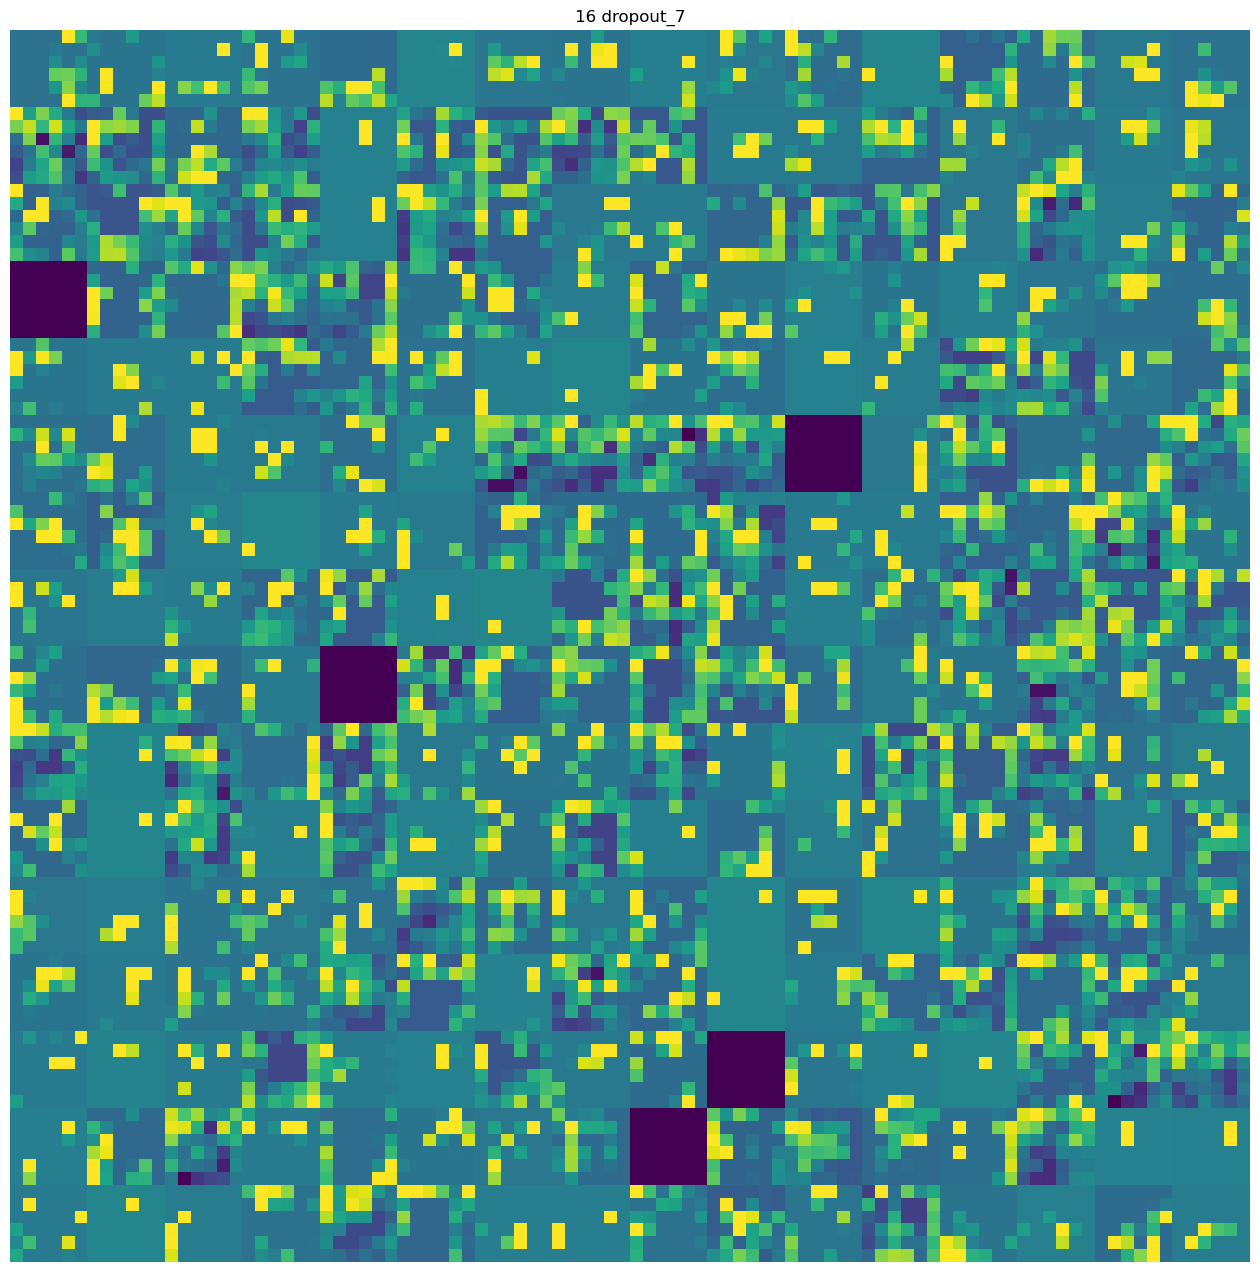

In [12]:
# display and save activations for cat_img
display_activations(img_pth = cat_img ,activations_model = activations_model
                    , images_per_row = 16 , save_dir = cat_activations)

In [13]:
# centers images of size (1600,1600) inside a canvas of the same size, used on the generated activations grids
def center_imgs(imgs_dir):
    for i,filename in enumerate(os.listdir(imgs_dir)):
        img = 255 * np.ones((1600,1600,3))
        fig = cv2.imread(os.path.join(imgs_dir,filename))
        img[(img.shape[0] // 2 ) - fig.shape[0] // 2:  (img.shape[0] // 2 ) + fig.shape[0] // 2] = fig
        
        text = f'{filename[:-4]}'
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_scale = 2.75
        text_thickness = 8
        text_size = cv2.getTextSize(text, font, text_scale, text_thickness)[0]
        height, width, _ = img.shape
        
        x = int((width - text_size[0]) / 2)
        
        img = cv2.putText(img,text,(x,150),font, text_scale, (0, 0, 255), text_thickness, cv2.LINE_AA)
        cv2.imwrite(f"{imgs_dir}/{filename}", img)
    


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


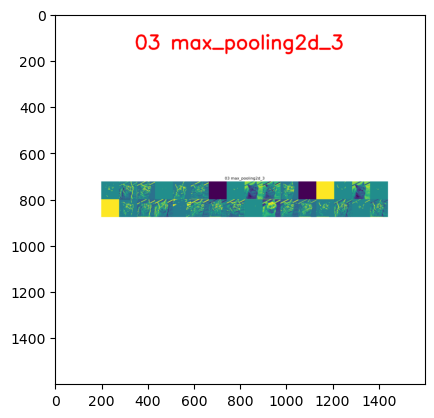

In [14]:
center_imgs(cat_activations)
plt.imshow(imageio.imread(os.path.join(cat_activations,os.listdir(cat_activations)[3])))

In [15]:
print(len(os.listdir('/kaggle/working/activations')))
print(os.listdir(cat_activations))


4
['09 conv2d_5.png', '06 batch_normalization_5.png', '07 max_pooling2d_4.png', '03 max_pooling2d_3.png', '08 dropout_5.png', '02 batch_normalization_4.png', '10 batch_normalization_6.png', '15 max_pooling2d_6.png', '12 dropout_6.png', '01 conv2d_3.png', '11 max_pooling2d_5.png', '13 conv2d_6.png', '14 batch_normalization_7.png', '05 conv2d_4.png', '04 dropout_4.png', '16 dropout_7.png']


In [16]:
# creates GIFs from images located within a directory
def create_gif(source_path,save_dir,fps = 0.5):
    with imageio.get_writer(save_dir, mode='I', fps = fps) as writer:
        for filename in sorted(os.listdir(source_path)):
            #print(filename,end =' - ')
            image = imageio.imread(os.path.join(source_path,filename))
            writer.append_data(image)

In [17]:
# create a GIF for the activations of cat_img
create_gif(cat_activations,'cat activations.gif',fps = 0.5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


In [ ]:
# display and save activations for dog_img
display_activations(img_pth = dog_img ,activations_model = activations_model
                    , images_per_row = 16 , save_dir = dog_activations)

In [ ]:
# display and save activations for two_cats_img
display_activations(img_pth = two_cats_img ,activations_model = activations_model
                    , images_per_row = 16 , save_dir = two_cats_activations)

In [ ]:
# display and save activations for two_dogs_img
display_activations(img_pth = two_dogs_img ,activations_model = activations_model
                    , images_per_row = 16 , save_dir = two_dogs_activations)

In [ ]:
# centering and adding titles to the grid activations
center_imgs(dog_activations)
center_imgs(two_dogs_activations)
center_imgs(two_cats_activations)

In [ ]:
# creating GIFs for the grid activations for each of the test imgs
create_gif(dog_activations,'dog activations.gif',fps = 0.5)
create_gif(two_cats_activations,'two cats activations.gif',fps = 0.5)
create_gif(two_dogs_activations,'two dogs activations.gif',fps = 0.5)

### Displaying and saving results v2

In [18]:
# adjusts a text in an image
def center_text(img,text='', font_scale = 0.5 ,offset = (0,0)):
    font = cv2.FONT_HERSHEY_SIMPLEX
    

    # Get the size of the text string
    (text_width, text_height) = cv2.getTextSize(text, font, font_scale, thickness=2)[0]

    # Calculate the x, y coordinates for the text
    x = int((img.shape[1] - text_width) / 2)
    y = text_height + 5

    img = cv2.putText(img,text,(x + offset[0],y + offset[1]),
                      font, font_scale, (0, 0, 255),
                      1, cv2.LINE_AA)



In [19]:
# save each activation for each layer individually of a certain img
def save_conv_activations(img_path, model ,save_dir ):
    # save only the conv layers indices in a list

    conv_idxs = [i for i,layer in enumerate(model.layers) if "conv" in layer.name]
    print(conv_idxs)
    activations = get_model_activations(img_path,model)
    print(conv_idxs)
    for layer in conv_idxs:
        for feature_map in range(activations[layer].shape[3]):
            activation = activations[layer][0,:,:,feature_map]

            # Normalize the grayscale image
            normalized = cv2.normalize(activation, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            # Apply viridis colormap
            viridis = cv2.applyColorMap(normalized, cv2.COLORMAP_VIRIDIS)
            im_size = viridis.shape[0]
            viridis = cv2.resize(viridis,(256,256))


            # border to add to the image in order to expand it
            border_width = 75
            border_color = [255, 255, 255]  # white color in BGR format

            # Add border to the image
            viridis = cv2.copyMakeBorder(viridis, border_width, border_width, 
                                         border_width, border_width, cv2.BORDER_CONSTANT, 
                                         value=border_color)

            # Get the size of the text string
            text1 = "Size -- Layer idx -- Feature map idx"
            text2=f'({im_size}x{im_size})--{layer:02d}--{feature_map:03d}'

            # add adjusted text
            center_text(viridis,text1)
            center_text(viridis,text2,font_scale = 1 ,offset = (0,40))

            cv2.imwrite(f'{save_dir}/{layer:02d}--{feature_map:03d}.png',viridis)
    

In [20]:
# save each activation for each layer individually of a cat_img
save_conv_activations(cat_img, activations_model , 
                      cat_activations_2)

[0, 1, 5, 9, 13]
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 27ms/step
[0, 1, 5, 9, 13]


In [21]:
# create a GIF for each activation for each layer individually of a cat_img
create_gif(cat_activations_2,'cat activations 2.gif',fps = 5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


In [ ]:
save_conv_activations(dog_img, activations_model , 
                      dog_activations_2)

save_conv_activations(two_dogs_img, activations_model , 
                      two_dogs_activations_2)

save_conv_activations(two_cats_img, activations_model , 
                      two_cats_activations_2)

In [ ]:
create_gif(dog_activations_2,'dog_activations_2.gif',fps = 5)
create_gif(two_dogs_activations_2,'two_dogs_activations_2.gif',fps = 5)
create_gif(two_cats_activations_2,'two_cats_activations_2.gif',fps = 5)

### Saving all results in a zip file

In [ ]:
# save results to a results.zip file for later download
!zip -r results.zip /kaggle/working